# Trabalho 2
Descrição do trabalho:

https://web.tecgraf.puc-rio.br/~mgattass/visao/trb/T2.html

Aluno: Daniel da Silva Costa

E-mail: danieldasilvacosta@gmail.com

### Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

### Função

y = np.sin(np.pi\*x) - x\*\*3

In [212]:
num_points = 101
x = np.linspace( -1, 1, num_points )
y = np.sin( np.pi * x) - x**3

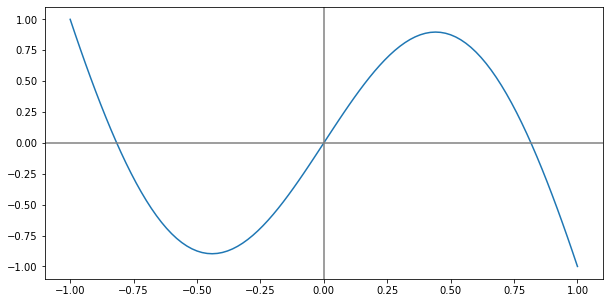

In [213]:
plt.figure( figsize = ( 10, 5 ) )
plt.plot( x, y )
plt.axhline( 0, color='gray')
plt.axvline( 0, color='gray')
plt.show()

### Solução por Mínimos Quadrados

In [214]:
# sxy = sx = sy = sx2 = 0
# n = x_.shape[0]

# for i in range(n):

#     sxy += x_[i] * y_[i]
#     sx += x_[i]
#     sy += y_[i]
#     sx2 += x_[i]**2

# a_ls = ( n * sxy - sx * sy ) / ( n * sx2 - sx * sx )
# b_ls = ( sy * sx2 - sx * sxy ) / ( n * sx2 - sx * sx )

In [184]:
# print( f'=== a ===' )
# print( f'ls = {a_ls:.3f}' )
# print( f'gd = {a0_gd:.3f}' )
# print()

# print( f'=== b ===' )
# print( f'ls = {b_ls:.3f}' )
# print( f'gd = {b0_gd:.3f}' )

In [ ]:
# # Somatório das distâncias d = y - y_pred
# for i in range( len(x) ):

#     y_pred_i = np.sin( np.pi * x[i]) - x[i]**3
#     np.power( ( y[i] - y_pred_i ) , 2)

In [ ]:
# x_ = np.array( [0.0, 1.0, 2.0, 3.0, 4.0, 5.0] )
# y_ = np.array( [0.4, 0.7, 1.9, 2.0, 3.2, 4.5] )

In [ ]:
# fig = plt.figure( figsize=( 4, 4 ) )
# plt.scatter( x_, y_ )
# plt.show()

In [ ]:
# a = np.arange( -2, 3, 0.1 )
# b = np.arange( -2, 3, 0.1 )
# aa, bb = np.meshgrid( a, b, sparse = True)

In [ ]:
# a

In [ ]:
# b

In [ ]:
# err = calcula_erro( aa, bb )

In [37]:
# z = np.power( err, 0.2 )
# n_levels = 15

In [ ]:
# h = plt.contourf( a, b, z, n_levels )
# plt.axis( 'scaled' )
# plt.colorbar()
# plt.show()

### Gradiente Descendente

In [197]:
def calcula_erro( a, b, c, d ):

    soma = 0.0
    n = len(x)
    for i in range(n):

        e  = y[i] - ( a + b*x[i] + c*(x[i]**2) + d*(x[i]**3) )
        soma += e**2

    return soma/n

In [198]:
def calcula_derivada_a( a, b, c, d ):

    soma = 0.0
    for i in range( len(x) ):

        soma += y[i] - a - b*x[i] - c*(x[i]**2) - d*(x[i]**3)

    return -2 * soma

In [199]:
def calcula_derivada_b( a, b, c, d ):

    soma = 0.0
    for i in range( len(x) ):

        soma += x[i] * (y[i] - a - b*x[i] - c*(x[i]**2) - d*(x[i]**3))

    return -2 * soma

In [200]:
def calcula_derivada_c( a, b, c, d ):

    soma = 0.0
    for i in range( len(x) ):

        soma += x[i] * (y[i] - a - b*x[i] - c*(x[i]**2) - d*(x[i]**3))

    return -4 * soma

In [201]:
def calcula_derivada_d( a, b, c, d ):

    soma = 0.0
    for i in range( len(x) ):

        soma += (x[i]**2) * (y[i] - a - b*x[i] - c*(x[i]**2) - d*(x[i]**3))

    return -6 * soma

In [202]:
a = np.random.rand()
b = np.random.rand()
c = np.random.rand()
d = np.random.rand()

print( f'a: {a}' )
print( f'b: {b}' )
print( f'c: {c}' )
print( f'd: {d}' )

a: 0.9411899908139824
b: 0.7319408466270871
c: 0.6925683534630863
d: 0.05310816379678995


In [203]:
err = calcula_erro( a, b, c, d )
err

2.2879548910816063

In [204]:
def grad_desc( a0, b0, c0, d0, tol, max_it, learning_rate ):

    erro0 = calcula_erro( a0, b0, c0, d0 )
    erros = [erro0]
    
    for it in range( max_it ):

        derivada_a = calcula_derivada_a( a0, b0, c0, d0 )
        derivada_b = calcula_derivada_b( a0, b0, c0, d0 )
        derivada_c = calcula_derivada_c( a0, b0, c0, d0 )
        derivada_d = calcula_derivada_d( a0, b0, c0, d0 )

        a1 = a0 - learning_rate * derivada_a
        b1 = b0 - learning_rate * derivada_b
        c1 = c0 - learning_rate * derivada_c
        d1 = d0 - learning_rate * derivada_d

        erro1 = calcula_erro( a1, b1, c1, d1 )
        erros.append( erro1 )

        tol_erro = abs(erro1 - erro0) < tol
        tol_a = abs(a1 - a0) < tol
        tol_b = abs(b1 - b0) < tol
        tol_c = abs(c1 - c0) < tol
        tol_d = abs(d1 - d0) < tol
        if tol_erro and tol_a and tol_b and tol_c and tol_d:

            print( f'Convergiu na iteração {it}' )
            print( f'Erro atual = {erro1:.3f}' )
            print( f'Delta erro = {erro1 - erro0}' )
            break
        
        a0 = a1
        b0 = b1
        c0 = c1
        d0 = d1
        erro0 = erro1

    print( f'Solução a = {a1:.3f}' )
    print( f'Solução b = {b1:.3f}' )
    print( f'Solução c = {c1:.3f}' )
    print( f'Solução d = {d1:.3f}' )

    return a0, b0, c0, d0, np.array(erros)

Solução a = -0.080
Solução b = 0.791
Solução c = 0.811
Solução d = -1.363


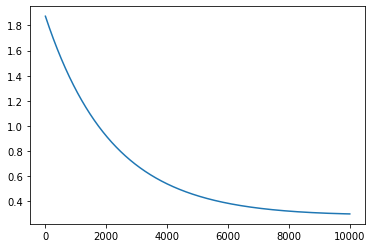

CPU times: user 8.68 s, sys: 22.4 ms, total: 8.7 s
Wall time: 8.71 s


In [233]:
%%time

a0_gd, b0_gd, c0_gd, d0_gd, erros = grad_desc(a0 = a,
                                              b0 = b, 
                                              c0 = c, 
                                              d0 = d, 
                                              tol = 1e-5, 
                                              max_it = 10000, 
                                              learning_rate = 0.000001)

interacao = np.linspace( 0, erros.shape[0] - 1, erros.shape[0] )
plt.plot( interacao, erros )
plt.show()

In [234]:
y_novo = -0.080 + 0.791*x + 0.811*(x**2) + -1.363*(x**3)

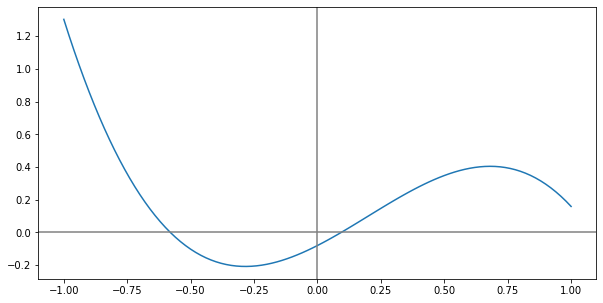

In [235]:
plt.figure( figsize = ( 10, 5 ) )
plt.plot( x, y_novo )
plt.axhline( 0, color='gray')
plt.axvline( 0, color='gray')
plt.show()

In [149]:
# h = plt.contourf( a, b, z, n_levels )

# plt.axis( 'scaled' )
# plt.plot( caminho[:, 0], caminho[:, 1], 'r' )
# plt.colorbar()
# plt.show()

### Pytorch (autograd)

In [ ]:
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

In [ ]:
n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')
# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

#samples: 4, #features: 1


In [ ]:
input_size = n_features
output_size = n_features

In [ ]:
# model = nn.Linear(input_size, output_size)

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
model = LinearRegression(input_size, output_size)

In [ ]:
# class MeuModelo(nn.Module):
#     def __init__(self, input_dim, output_dim):
        
#         # super(LinearRegression, self).__init__()
#         self.forward = nn.Linear(input_dim, output_dim)
#     def forward(self, x):
#         return self.lin(x)
# model = LinearRegression(input_size, output_size)

In [ ]:
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

Prediction before training: f(5) = -4.125


In [ ]:
learning_rate = 0.01
n_iters = 100

In [ ]:
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

epoch  1 : w =  1.7890064716339111  loss =  tensor(0.0647, grad_fn=<MseLossBackward0>)
epoch  11 : w =  1.795238971710205  loss =  tensor(0.0609, grad_fn=<MseLossBackward0>)
epoch  21 : w =  1.8012874126434326  loss =  tensor(0.0574, grad_fn=<MseLossBackward0>)
epoch  31 : w =  1.8071571588516235  loss =  tensor(0.0540, grad_fn=<MseLossBackward0>)
epoch  41 : w =  1.812853455543518  loss =  tensor(0.0509, grad_fn=<MseLossBackward0>)
epoch  51 : w =  1.8183815479278564  loss =  tensor(0.0479, grad_fn=<MseLossBackward0>)
epoch  61 : w =  1.8237463235855103  loss =  tensor(0.0451, grad_fn=<MseLossBackward0>)
epoch  71 : w =  1.8289527893066406  loss =  tensor(0.0425, grad_fn=<MseLossBackward0>)
epoch  81 : w =  1.8340051174163818  loss =  tensor(0.0400, grad_fn=<MseLossBackward0>)
epoch  91 : w =  1.8389084339141846  loss =  tensor(0.0377, grad_fn=<MseLossBackward0>)
Prediction after training: f(5) = 9.677


In [ ]:
x = torch.randn(3, requires_grad=True)
y = x + 2

# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a Function that has created the Tensor
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

# Do more operations on y
z = y * y * 3
print(z)
z = z.mean()
print(z)

# Let's compute the gradients with backpropagation
# When we finish our computation we can call .backward() and have all the gradients computed automatically.
# The gradient for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the function w.r.t. the tensor

z.backward()
print(x.grad) # dz/dx

# Generally speaking, torch.autograd is an engine for computing vector-Jacobian product
# It computes partial derivates while applying the chain rule

# -------------
# Model with non-scalar output:
# If a Tensor is non-scalar (more than 1 elements), we need to specify arguments for backward() 
# specify a gradient argument that is a tensor of matching shape.
# needed for vector-Jacobian product

x = torch.randn(3, requires_grad=True)

y = x * 2
for _ in range(10):
    y = y * 2

print(y)
print(y.shape)

v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float32)
y.backward(v)
print(x.grad)

# -------------
# Stop a tensor from tracking history:
# For example during our training loop when we want to update our weights
# then this update operation should not be part of the gradient computation
# - x.requires_grad_(False)
# - x.detach()
# - wrap in 'with torch.no_grad():'

# .requires_grad_(...) changes an existing flag in-place.
a = torch.randn(2, 2)
print(a.requires_grad)
b = ((a * 3) / (a - 1))
print(b.grad_fn)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

# .detach(): get a new Tensor with the same content but no gradient computation:
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
b = a.detach()
print(b.requires_grad)

# wrap in 'with torch.no_grad():'
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    print((x ** 2).requires_grad)

# -------------
# backward() accumulates the gradient for this tensor into .grad attribute.
# !!! We need to be careful during optimization !!!
# Use .zero_() to empty the gradients before a new optimization step!
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    # just a dummy example
    model_output = (weights*3).sum()
    model_output.backward()
    
    print(weights.grad)

    # optimize model, i.e. adjust weights...
    with torch.no_grad():
        weights -= 0.1 * weights.grad

    # this is important! It affects the final weights & output
    weights.grad.zero_()

print(weights)
print(model_output)

# Optimizer has zero_grad() method
# optimizer = torch.optim.SGD([weights], lr=0.1)
# During training:
# optimizer.step()
# optimizer.zero_grad()